# Laboratorio di simulazioni numeriche
### Esercizio 1.1
Viene richiesto di verificare l'integrale $\langle r \rangle = \int_0^1 r dr = 1/2$  attraverso l'utilizzo di un generatore di numeri casuali, stampando a video il risultati delle simulazioni con le relative barre d'errore. La media viene calcolata utilizzando il metodo della media a blocchi sui dati campionati. I risultati ottenuti risultano in accordo con la previsione teorica.

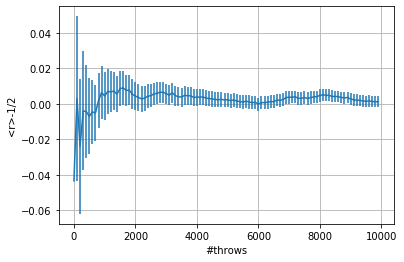

In [35]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

file = np.loadtxt("Lab1/data1.dat")
nthrows = file[:,0]
mean = file[:,1]
error = file[:,2]

plt.errorbar(nthrows,mean-0.5,yerr=error)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()

Viene poi richiesto di verificare che $\sigma^2 = \int_0^1 (r-1/2)^2 dr = 1/12$. Nuovamente le simulazioni risultano in accordo con le previsioni teoriche.

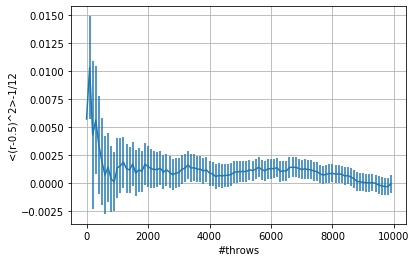

In [36]:
file2 = np.loadtxt("Lab1/data2.dat")
nthrows2 = file2[:,0]
mean2 = file2[:,1]
error2 = file2[:,2]

plt.errorbar(nthrows2,mean2-1/12,yerr=error2)
plt.xlabel('#throws')
plt.ylabel('<(r-0.5)^2>-1/12')
plt.grid(True)
plt.show()

Come ultimo passo, viene richiesto di effettuare un test del chi-quadro suddividendo l'intervallo $[0,1]$ in $M=100$ sottointervalli per verificare che degli $n=10^4$ punti generati casualmente in modo uniforme, quelli che cadono in ogni sottointervallo siano confrontabili con $n/M$. Ci si aspetta $\chi^2 \simeq 100$: i dati ottenuti fluttuano intorno a tale valore. Per avere conferma che statisticamente il valore di $\chi^2$ sia quello atteso è stata effettuata una media a blocchi in funzione dei sottoinfevalli. Il grafico mostra come il risultato finale, quello che comprende tutti i sottointervalli, descriva bene il risultato atteso.

In [37]:
def error(AV,AV2,n):  # Function for statistical uncertainty estimation
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

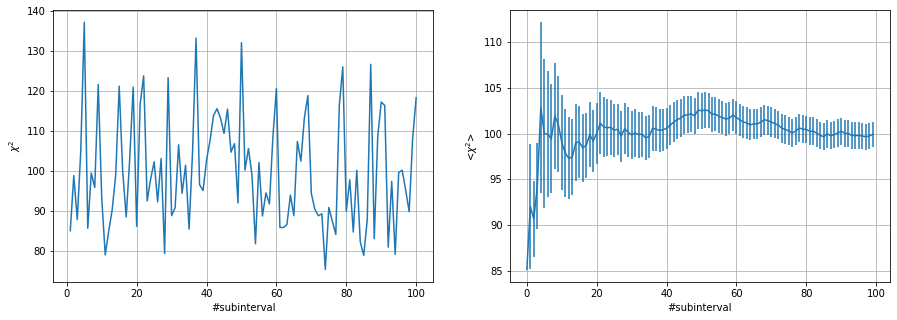

In [38]:
file3 = np.loadtxt("Lab1/data3.dat")
subinterval = file3[:,0]
chi = file3[:,1]

N=len(chi)
L=1                
x = np.arange(N)      
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += chi[k]
    ave[i] = sum/L       
    av2[i] = (ave[i])**2

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] 
        su2_prog[i] += av2[j] 
    sum_prog[i]/=(i+1) 
    su2_prog[i]/=(i+1) 
    err_prog[i] = error(sum_prog,su2_prog,i) 

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.errorbar(subinterval,chi)
plt.xlabel('#subinterval')
plt.ylabel('$\chi^2$')
plt.grid(True)
plt.subplot(1,2,2)
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.xlabel('#subinterval')
plt.ylabel('<$\chi^2$>')
plt.grid(True)
plt.show()

### Esercizio 1.2
Viene richiesto di verificare il teorema del limite centrale graficando degli istogrammi che rappresentino le somme $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ (per $N=1, 2, 10, 100$), dove $x_i$ rappresenta il risultato di un lancio di dado:
- standard;
- esponenenziale;
- lorentziano.

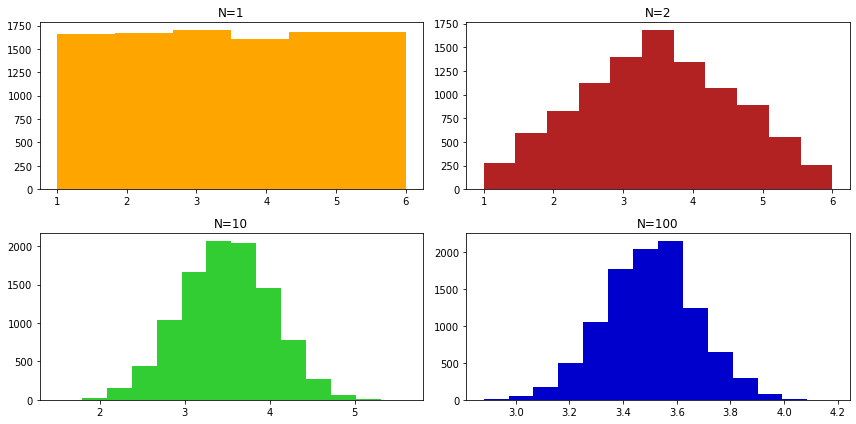

In [39]:
#DADO STANDARD

ndice = np.loadtxt("Lab1/ndice.dat")
s1n = ndice[:,0]
s2n = ndice[:,1]
s10n = ndice[:,2]
s100n = ndice[:,3]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(s1n, 6, color='orange')
ax0.set_title('N=1')

ax1.hist(s2n, 11, color='firebrick')
ax1.set_title('N=2')

ax2.hist(s10n, 14, color='limegreen')
ax2.set_title('N=10')

ax3.hist(s100n, 14, color='mediumblue')
ax3.set_title('N=100')

fig.tight_layout()
plt.show()

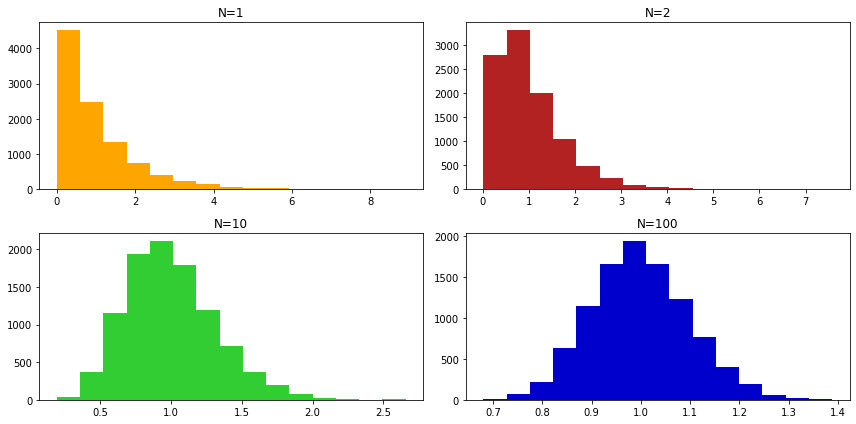

In [40]:
#DADO ESPONENZIALE

edice = np.loadtxt("Lab1/edice.dat")
s1e = edice[:,0]
s2e = edice[:,1]
s10e = edice[:,2]
s100e = edice[:,3]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(s1e, 15, color='orange')
ax0.set_title('N=1')

ax1.hist(s2e, 15, color='firebrick')
ax1.set_title('N=2')

ax2.hist(s10e, 15, color='limegreen')
ax2.set_title('N=10')

ax3.hist(s100e, 15, color='mediumblue')
ax3.set_title('N=100')

fig.tight_layout()
plt.show()

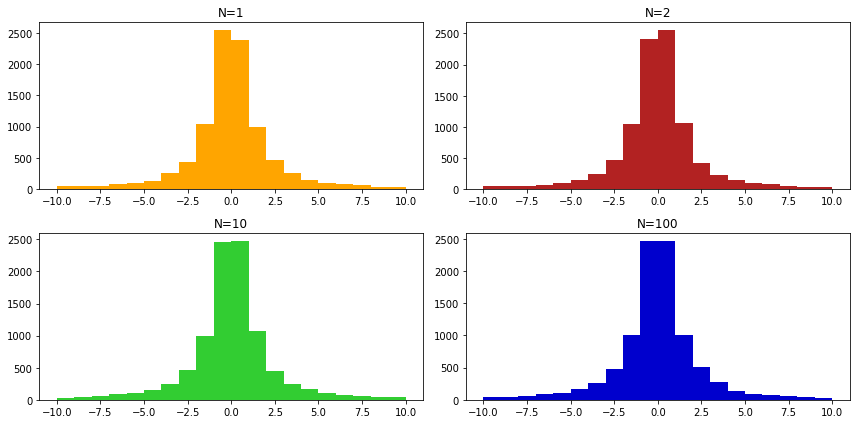

In [41]:
#DADO LORENTZIANO

ldice = np.loadtxt("Lab1/ldice.dat")
s1l = ldice[:,0]
s2l = ldice[:,1]
s10l = ldice[:,2]
s100l = ldice[:,3]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(s1l, 20, range=(-10,10), color='orange')
ax0.set_title('N=1')

ax1.hist(s2l, 20, range=(-10,10), color='firebrick')
ax1.set_title('N=2')

ax2.hist(s10l, 20, range=(-10,10), color='limegreen')
ax2.set_title('N=10')

ax3.hist(s100l, 20, range=(-10,10), color='mediumblue')
ax3.set_title('N=100')

fig.tight_layout()
plt.show()

I risultati ottenuti mostrano come all'aumentare del numero di lanci, sia il dado standard che quello esponenziale vadano a produrre istogrammi qualitativamente gaussiani. Nel caso di dado lorentiziano invece questo non accade: gli istogrammi presentano sempre la caretteristica forma di una lorentziana.

### Esercizio 1.3
Viene richiesto di simulare l'esperimento di Buffon per stimare il valore di $\pi$ secondo la relazione

$$\pi_{exp} = \frac{2L}{Pd} = \lim_{N_{thr} \to \infty}\frac{2LN_{thr}}{N_{hit}d}$$

dove $L$ è la lunghezza dell'ago gettato, $d$ la distanza tra linee consecutive e $P$ la probabilità che un ago intersechi una linea, $N_{thr}$ il numero di lanci in ogni esperimento e $N_{hit}$ il numero di lanci per esperimento in cui l'ago interseca una linea. Sono stati simulati $M=10^4$ esperimenti ognuno con $N_{thr}=10^4$ e anche in questo caso il valore di $\pi_{exp}$ è stato calcolato utilizzando il metodo della media a blocchi. Anche in questo caso i risultati numerici sono in buon accordo con le previsioni.

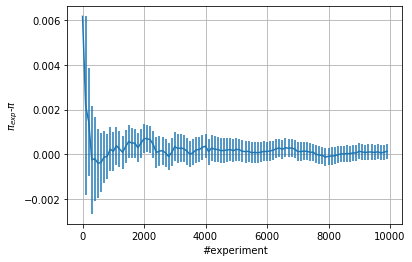

In [42]:
buffon = np.loadtxt("Lab1/buffon.dat")
nexperiment = buffon[:,0]
pi = buffon[:,1]
error = buffon[:,2]

plt.errorbar(nexperiment,pi-np.pi,yerr=error)
plt.xlabel('#experiment')
plt.ylabel('$\pi_{exp}$-$\pi$')
plt.grid(True)
plt.show()